# Notebook 1: Introduction to CollateX

In this Jupyter notebook, you'll learn how to work with the automated text collation tool CollateX.

Please note: run the code cells in this notebook in the right order. For example, you first need to tell Python that you need the Python library that holds the code for CollateX, by running the code cell `from collatex import*`, before you can start running the other cells. You can recognize a code cell by the `In [x]` on the left side of the cell.

How to run a cell? It's simple: either click on the cell (so that your cursor is in the cell). Hold shift and press enter, or click on `Run` in the menu bar.

### Before you proceed

You'd want to start afresh, so make sure that the cells in this notebook do not already have any output. You can do so by selecting `Kernel >> Restart & Clear Output`  in the menu bar above. You'll be asked whether you're sure; after confirming this your notebook will restart.

## Set-up

First, let's set up our working environment. Normally, when not working in a binder environment, you'd check whether you have the latest version of CollateX installed:

In [3]:
!pip install --upgrade collatex

Although this is not necessary in the present case, because the binder environment includes CollateX, it's good to make this part of your practice. You do not need to run `pip install --upgrade collatex` everytime, but make sure you do it regularly.

Secondly, you import the Python library that contains the code of CollateX by running:

In [1]:
from collatex import*

You will *not* get any confirmation of the import being succesfull; you only know when it hasn't worked because you'll get an error message. 

## Step 1: Create a collation object.

Your first step is to create a collation object with this line of code: `UA_object = Collation()`. Saying `Collation()` tells CollateX to create a new, empty Collation "instance". Collation is a sort of special data type, that was created especially for CollateX. The `UA_object` is a variable name, this could be anything you like.

In [2]:
UA_collation = Collation()

After running the cell, your empty collation is ready for you to add witnesses.

## Step 3: Add witnesses to your collation object.

Each witness gets:

- a unique name (the *sigil*) to identify it. The sigil can be a single letter or a longer name.
- the witness' text that will be collated.

You add witnesses to your collation object with the function `add_plain_witness()`.


In [3]:
UA_collation.add_plain_witness('A1', 'The sun shone, having no alternative, on the nothing new.')
UA_collation.add_plain_witness('B2', 'Having no alternative, The sun was shining, on nothing new.')
UA_collation.add_plain_witness('C3', 'The star shone, having no other option.')
UA_collation.add_plain_witness('D4', 'The moon\'s shining on all things new!' )

## Step 4: Collate.

Now it's time to collate all the witnesses you've just added. You do so with the function `collate()`.

We save the result of the collation into a variable, here conveniently called `UA_result`.

In [4]:
UA_result = collate(UA_collation)

What, nothing happened? This may seem so, but remember: you didn't actually ask to *see* the result. Do so now:

In [5]:
print(UA_result)

+----+-----------------------+--------+-------+---+-------------+--------------+---+----+------------+---------+-----+---+
| A1 | The                   | sun    | shone | , | having no   | alternative  | , | on | the        | nothing | new | . |
| B2 | Having no alternative | -      | -     | , | The sun was | shining      | , | on | -          | nothing | new | . |
| C3 | The                   | star   | shone | , | having no   | other option | - | -  | -          | -       | -   | . |
| D4 | The                   | moon's | -     | - | -           | shining      | - | on | all things | -       | new | ! |
+----+-----------------------+--------+-------+---+-------------+--------------+---+----+------------+---------+-----+---+


The result is printed in CollateX' most basic visualisation of the alignment table. The first column of the table contains the sigla of the witnesses. The tokens that are aligned are placed in the same column. Note that aligned does *not* necessarily mean the tokens are also considered a match! This basic visualisation only shows the alingment of the tokens, not whether or not they match. 

CollateX does provide more visualisation options that provide more information. For example, you can display each token in an individual cell of the alignment table by switching off the segmentation of the tokens:

In [6]:
UA_result = collate(UA_collation, segmentation=False)
print(UA_result)

+----+--------+------+-------------+---+--------+-----+-------------+---------+---+----+-----+---------+-----+---+
| A1 | The    | sun  | shone       | , | having | no  | alternative | -       | , | on | the | nothing | new | . |
| B2 | Having | no   | alternative | , | The    | sun | was         | shining | , | on | -   | nothing | new | . |
| C3 | The    | star | shone       | , | having | no  | other       | option  | - | -  | -   | -       | -   | . |
| D4 | The    | moon | '           | s | -      | -   | -           | shining | - | on | all | things  | new | ! |
+----+--------+------+-------------+---+--------+-----+-------------+---------+---+----+-----+---------+-----+---+


You can also go with HTML representations of the alignment table. 

There are two options; do play around with them.

In [7]:
UA_result = collate(UA_collation, segmentation=False, output='html')

A1,The,sun,shone,",",having,no,alternative,-,",",on,the,nothing,new,.
B2,Having,no,alternative,",",The,sun,was,shining,",",on,-,nothing,new,.
C3,The,star,shone,",",having,no,other,option,-,-,-,-,-,.
D4,The,moon,',s,-,-,-,shining,-,on,all,things,new,!


Adding the parameter `output='html2'` visualises the matching and non-matching tokens in blue and red respectively.

In [8]:
UA_result = collate(UA_collation, segmentation=False, output='html2')

And finally, the output of the collation can be respresented as a variant graph visualisation:

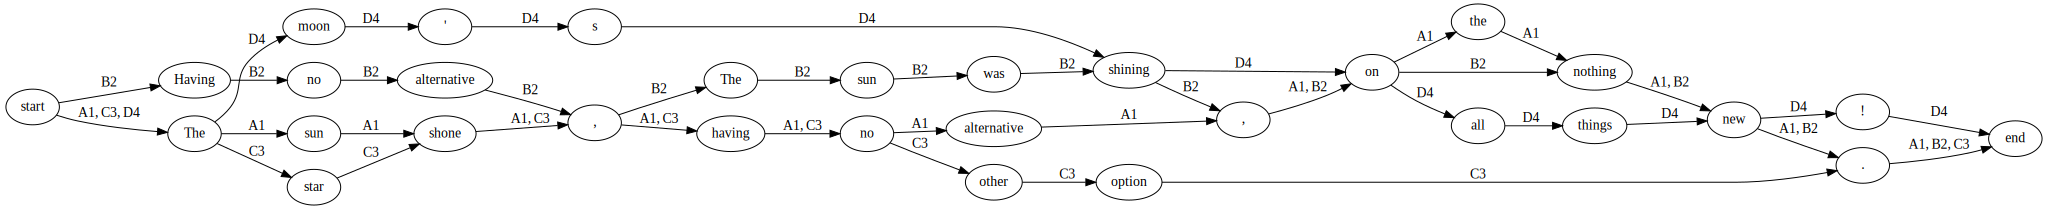

In [9]:
UA_result = collate(UA_collation, output='svg_simple', segmentation=False)

Remember: you read a variant graph from left to right, starting at the first node ("start"). The sigla of the witnesses are displayed on the edges. This visualisation clearly shows which tokens are considered a match: these are merged into the same node. The tokens that are not considered a match get their own node.

## Exercise

Now it's up to you! Play around with CollateX in this notebook. Follow the steps below:

### 1.  
Create a new Markdown cell. You can add a new cell by clicking on the `+` in the menu bar, or via `Insert >> Insert Cell Below`. The type of the cell is automatically set to Code; if you'd like to chanstandard alignment tablege that to Markdown, you can click on the drop down menu in the menu bar.

### 2. 
Write something in your new Markdown cell. For instance, "This is my first collation exercise." Press `Shift + enter` to run your cell, or click on `Run` in the menu bar.

### 3. 
Now add a new Code cell below your Markdown cell. Copy the code below in your Code cell:  
```
my_collation_object = Collation()  
my_collation_object.add_plain_witness('W1', 'I like cats and dogs.')  
my_collation_object.add_plain_witness('W2', 'I love cats and dogs as well.')  
my_collation_object.add_plain_witness('W3', 'Does he like cats as well?')  
my_result = collate(my_collation_object, output='html', segmentation=False)  
```

You can change the parameters of the `collate()` command as you please. For instance, try different outputs (standard alignment table, html alignment table, svg_simple) or switch layouts (by adding `layout='vertical'` as a parameter). Try the difference between `segmentation=False` and `segmentation=True`. And of course, you can also change the sigla, the text of the witnesses, and the names of the variables. Do make sure you use only UTF-8 characters, though.

## 4. 

Now play around with larger witnesses. You can use the datasets here: [link to datasets]. Download them on your local machine and point Python to the right path:

`W1 = open( "<path-to-file>", encoding='utf-8').read()`  
`W2 = open( "<path-to-file>", encoding='utf-8').read()`  
`W3 = open( "<path-to-file>", encoding='utf-8').read()`  

You can then add them to the collation instance as witnesses:  

`my_collation_object = Collation()`  
`my_collation_object.add_plain_witness('W1', W1)`  
etc.



This is my first collation excercise 

In [13]:
# W1 = open( "../OneDrive - Universiteit Antwerpen/COllatie/TxT_A_test.txt", encoding='utf-8').read()
# W1

In [10]:
W1 = open( "../data/correct_unicodes/A.txt", encoding='utf-8').read()
W2 = open( "../data/correct_unicodes/Ant.txt", encoding='utf-8').read()
#W3 = open( "../data/correct_unicodes/B.txt", encoding='utf-8').read()
#W4 = open( "../data/correct_unicodes/BR.txt", encoding='utf-8').read()
#W5 = open( "../data/correct_unicodes/C.txt", encoding='utf-8').read()
#W6 = open( "../data/correct_unicodes/D.txt", encoding='utf-8').read()
#W7 = open( "../data/correct_unicodes/D2.txt", encoding='utf-8').read()
#W8 = open( "../data/correct_unicodes/E.txt", encoding='utf-8').read()
#W9 = open( "../data/correct_unicodes/F.txt", encoding='utf-8').read()
#W10 = open( "../data/correct_unicodes/Ge.txt", encoding='utf-8').read()
#W11 = open( "../data/correct_unicodes/K.txt", encoding='utf-8').read()
#W12 = open( "../data/correct_unicodes/L.txt", encoding='utf-8').read()
#W13 = open( "../data/correct_unicodes/O.txt", encoding='utf-8').read()
#W14 = open( "../data/correct_unicodes/W.txt", encoding='utf-8').read()
#W15 = open( "../data/correct_unicodes/Y.txt", encoding='utf-8').read()
#W16 = open( "../data/correct_unicodes/Z.txt", encoding='utf-8').read()

In [12]:
my_collation_object = Collation()  
my_collation_object.add_plain_witness('W1', W1)  
my_collation_object.add_plain_witness('W2', W2)  
#my_collation_object.add_plain_witness('W3', W3)  
#my_collation_object.add_plain_witness('W4', W4)
#my_collation_object.add_plain_witness('W5', W5)  
#my_collation_object.add_plain_witness('W6', W6)  
#my_collation_object.add_plain_witness('W7', W7)  
#my_collation_object.add_plain_witness('W8', W8)  
#my_collation_object.add_plain_witness('W9', W9)  
#my_collation_object.add_plain_witness('W10', W10)  
#my_collation_object.add_plain_witness('W11', W11)  
#my_collation_object.add_plain_witness('W12', W12)  
#my_collation_object.add_plain_witness('W13', W13)
#my_collation_object.add_plain_witness('W14', W14)  
#my_collation_object.add_plain_witness('W15', W15)  
#my_collation_object.add_plain_witness('W16', W16)  


# my_collation_object.add_plain_witness('W3', W3)
# my_collation_object.add_plain_witness('W4', W4)
# my_result = collate(my_collation_object, segmentation=False, output='html') # dit geeft goede output! --> rertuned niks
my_result = collate(my_collation_object, segmentation=False)
print(my_result)

+----+-----+----------+-------+-----+------+------+-----+-----+-----+-------+------+-------+------+-----+----+-----+---------+------+-----+----+------+-------+--------+------+-----+-------+--------+------+------+-----+-------+-------+------+-----+----+-----+----+---------+-----+---------+-----+-----+----+-------+------+-------+-----+---+---+--------+-------+-------+-----+---+---+----+-----+----+--------+-------+-----+-------+----------+---+---+--------+-----+------+-----+-------+----+----+-------+-----+--------+--------+-----+----------+-----+-----+--------+-----+----------+-----+-----+-----+-----+------+------+-------+-----+----+------+------------+-----+-----+-----+-------+----------+---+---+-----+-----+---+---+----+----+-------+----+-----+----+-----+-----+-----+----+------+--------+-----+----+-------+------+---------+-----+-----+------+-------+-------+-------+----+-----+-----+------+-----------+-----+------+-----+-----+-------+-----+--------+-------+------+-----+------+-------+----+

In [13]:
print(my_result)


+----+-----+----------+-------+-----+------+------+-----+-----+-----+-------+------+-------+------+-----+----+-----+---------+------+-----+----+------+-------+--------+------+-----+-------+--------+------+------+-----+-------+-------+------+-----+----+-----+----+---------+-----+---------+-----+-----+----+-------+------+-------+-----+---+---+--------+-------+-------+-----+---+---+----+-----+----+--------+-------+-----+-------+----------+---+---+--------+-----+------+-----+-------+----+----+-------+-----+--------+--------+-----+----------+-----+-----+--------+-----+----------+-----+-----+-----+-----+------+------+-------+-----+----+------+------------+-----+-----+-----+-------+----------+---+---+-----+-----+---+---+----+----+-------+----+-----+----+-----+-----+-----+----+------+--------+-----+----+-------+------+---------+-----+-----+------+-------+-------+-------+----+-----+-----+------+-----------+-----+------+-----+-----+-------+-----+--------+-------+------+-----+------+-------+----+

In [ ]:
import json

with open('../data/correct_unicodes/test_a_ant.json', 'w', encoding='utf-8') as output_file:
#     output_file.write(my_result)
    all = []
    for i in my_result.columns:
#         for idx, tokens in i.tokens_per_witness.items():
    #         print(tokens)
    #     print('===')
        test = {}
        for n in i.tokens_per_witness:
            word = i.tokens_per_witness[n]
            test[n] = str(word)[1:-1]
        all.append(test)
    print(all)
    json.dump(
        all, output_file, indent=4)
        

001


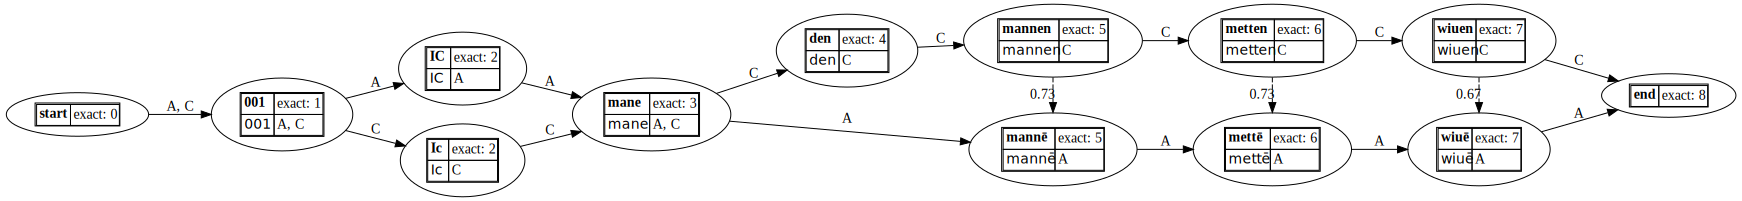

None
002


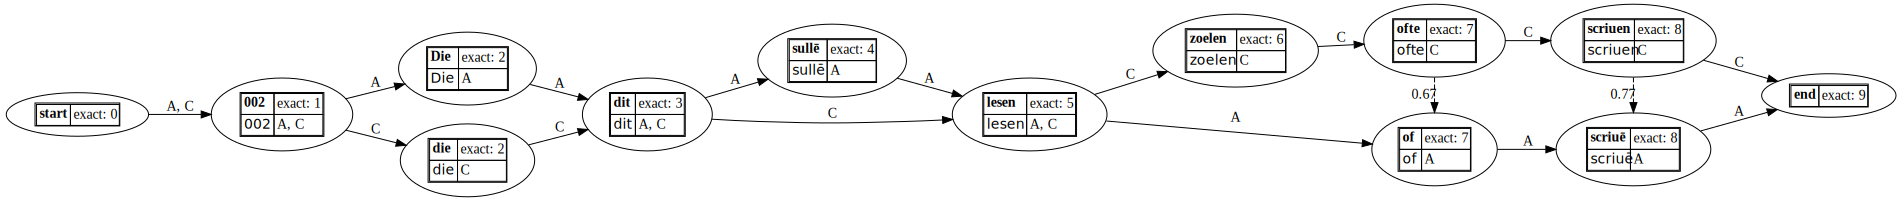

None
003


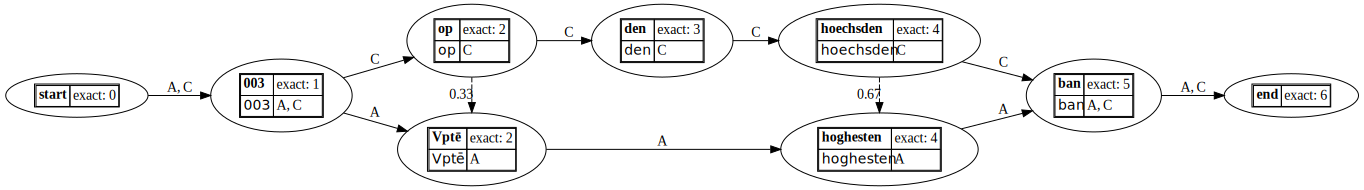

None
004


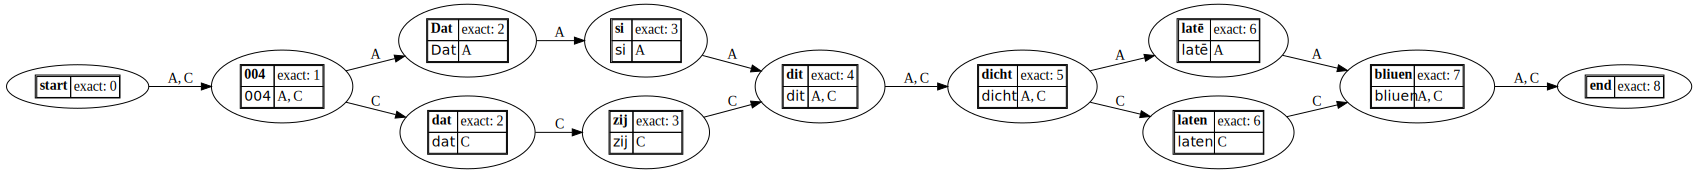

None
005


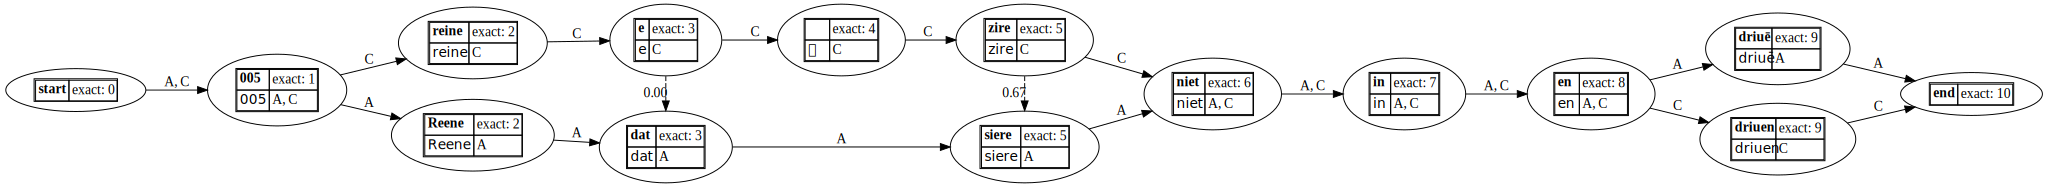

None
006


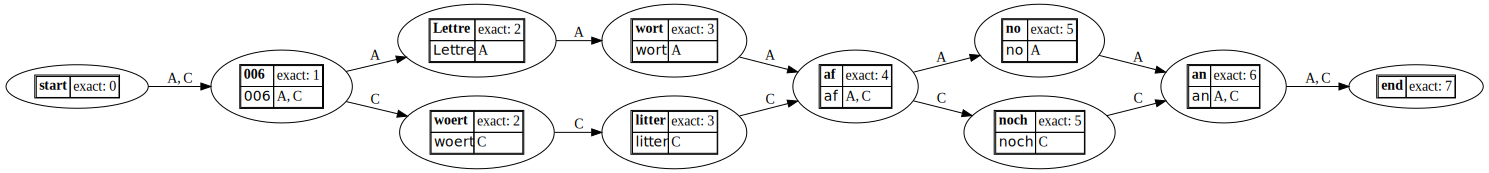

None
007


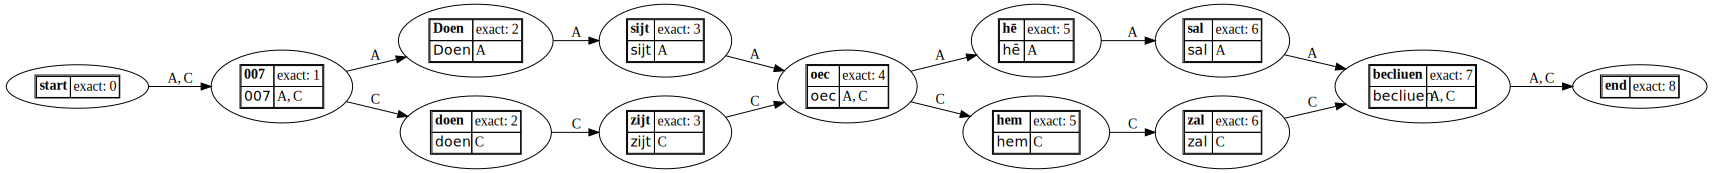

None
008


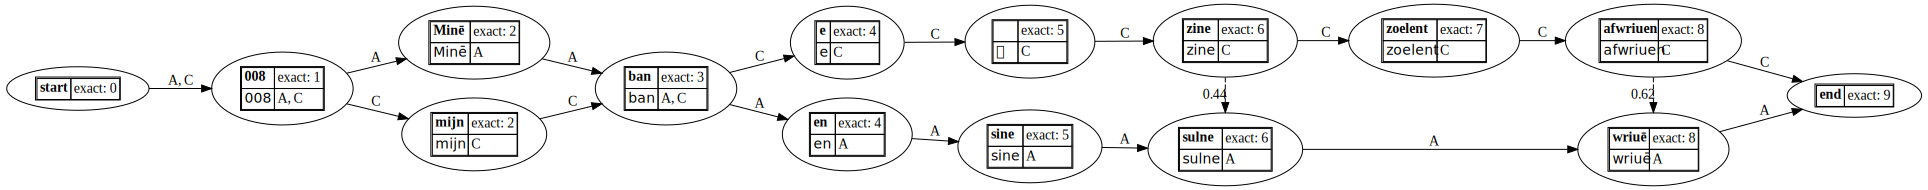

None
009


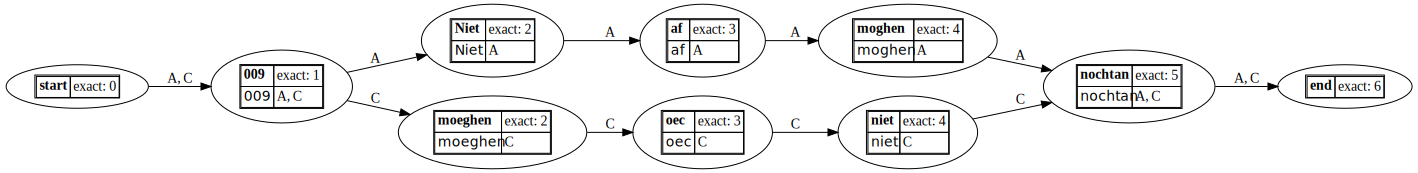

None
010


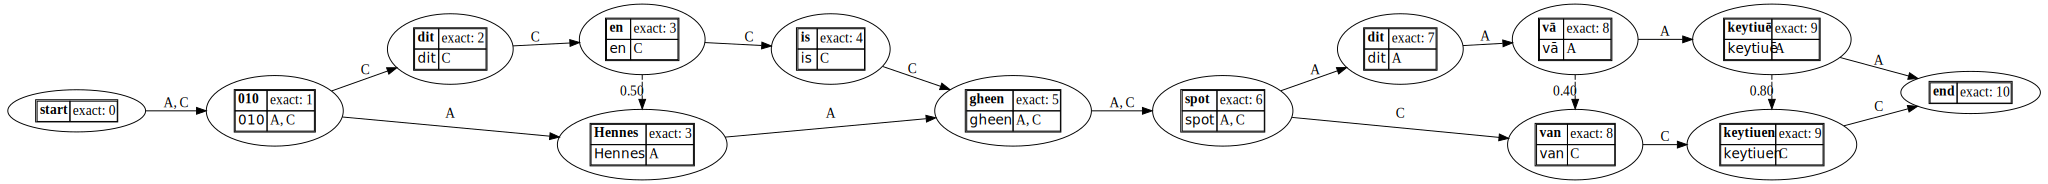

None
011


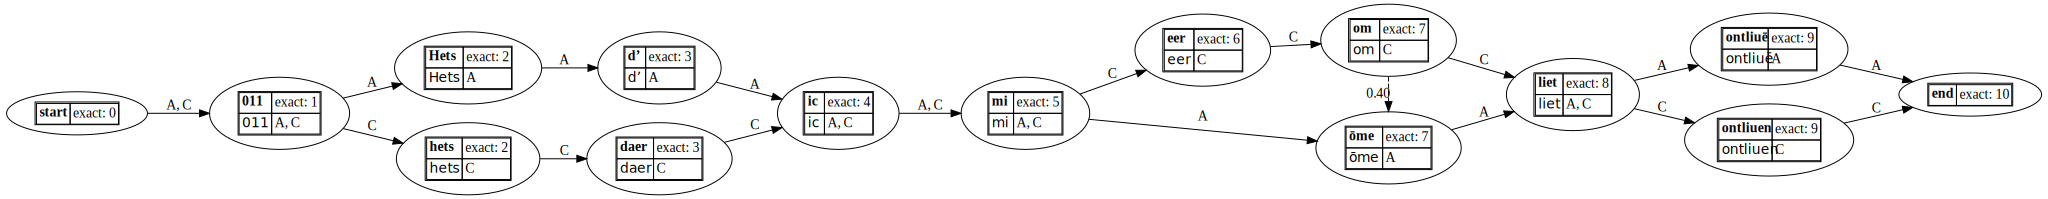

None
012


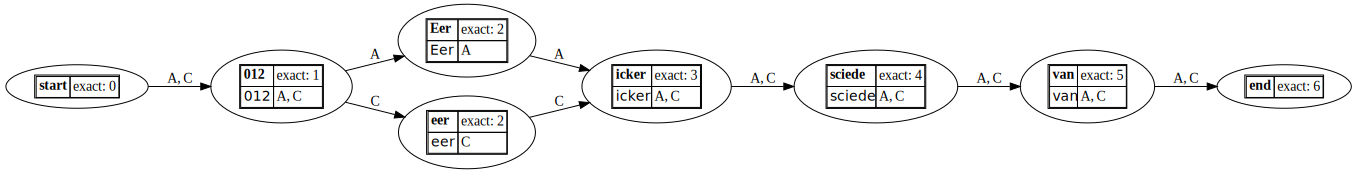

None
013


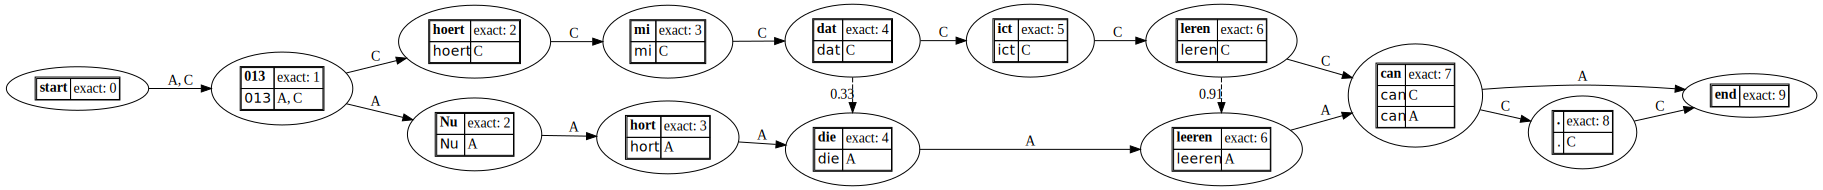

None
014


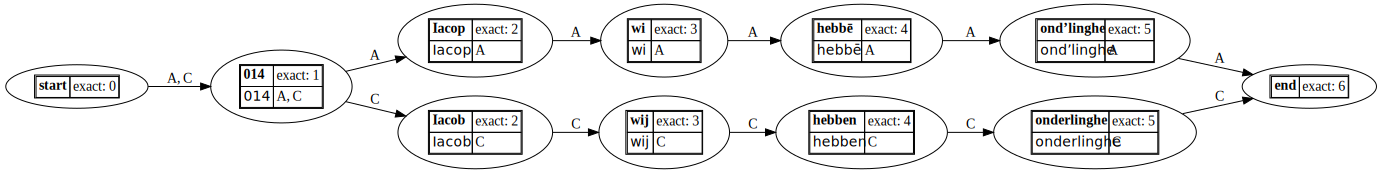

None
015


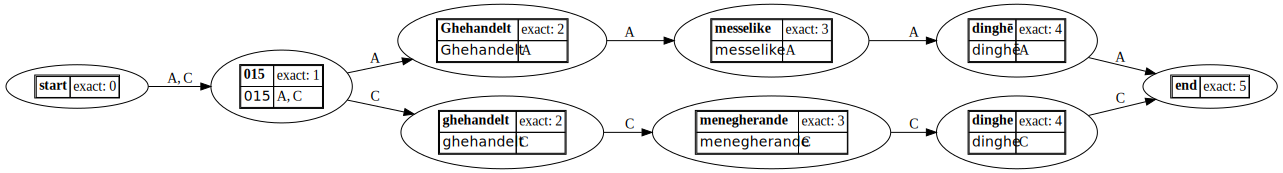

None
016


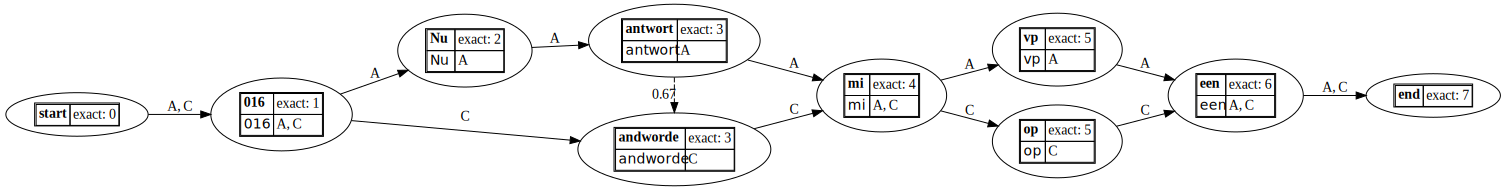

None
017


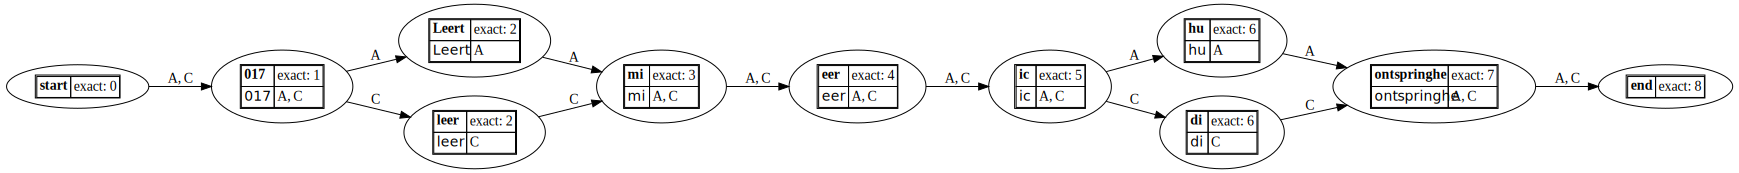

None
018


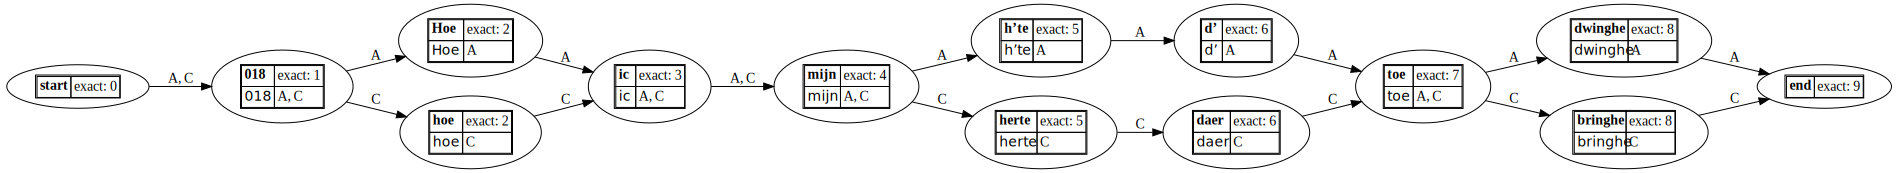

None
019


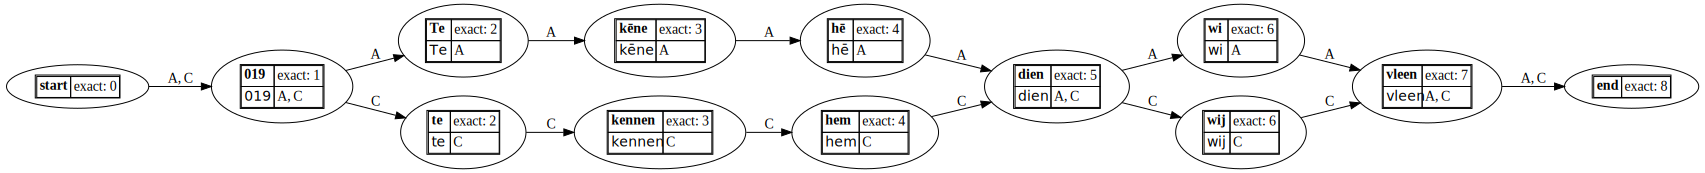

None




Error: syntax error in line 1 
... <B></B> ...
in label of node 3


CalledProcessError: Command '[PosixPath('dot'), '-Kdot', '-Tsvg', '-O', 'Digraph.gv']' returned non-zero exit status 1. [stderr: b'Error: syntax error in line 1 \n... <B></B> ...\nin label of node 3\n']

In [16]:
import re, os


def split_in_lines(path, *input_files):  # eg: "../data/correct_unicodes", "A", "B", "Ant", "BR"
    output = {}
    for input_file in input_files:
        input_file_path = os.path.join(path, (input_file + '.txt'))
        input = open(input_file_path, 'r', encoding='utf-8')
        for line in input.readlines():
            number = line.split(' ')[0]
            if number in output:
                output[number][input_file] = line
            else:
                output[number] = {input_file: line}
    return output

def send_to_collatex(data):  # stuur van elke versie 1 regel door
    my_collation_object = Collation()
    for name in data.keys():
        line = data[name]
        my_collation_object.add_plain_witness(name, line)
    my_result = collate(my_collation_object, segmentation=False, near_match=True)
    print(my_result)
    return my_result
        
documents_split_in_lines = split_in_lines("../data/correct_unicodes", "A_M1", "B_M1", "Ant_M1", "Br_M1", "C_M1", "D_M1", "D2_M1", "E_M1", "F_M1", "Ge_M1", "K_M1", "L_M1", "O_M1", "Y_M1", "Z_M1")
for number in documents_split_in_lines:
    print(number)
    send_to_collatex(documents_split_in_lines[number])